In [2]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [3]:
%matplotlib inline

from session.sessions import selected_009266
from imports import *
from matplotlib.patches import ConnectionPatch
from scipy.stats import pearsonr
from target import build_tgt_matrix
np.set_printoptions(suppress=True)

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
selected_009266

['009266_hippoSIT_2023-04-17_17-04-17',
 '009266_hippoSIT_2023-04-18_10-10-37',
 '009266_hippoSIT_2023-04-18_17-03-10',
 '009266_hippoSIT_2023-04-19_10-33-51',
 '009266_hippoSIT_2023-04-24_16-56-55',
 '009266_hippoSIT_2023-05-02_12-22-14',
 '009266_hippoSIT_2023-04-20_08-57-39',
 '009266_hippoSIT_2023-04-26_08-20-17',
 '009266_hippoSIT_2023-05-04_19-47-15',
 '009266_hippoSIT_2023-04-20_15-24-14',
 '009266_hippoSIT_2023-04-21_08-43-00',
 '009266_hippoSIT_2023-04-21_13-12-31',
 '009266_hippoSIT_2023-04-24_10-08-11',
 '009266_hippoSIT_2023-05-04_09-11-06',
 '009266_hippoSIT_2023-05-22_09-27-22',
 '009266_hippoSIT_2023-05-23_09-18-05',
 '009266_hippoSIT_2023-05-25_15-55-57',
 '009266_hippoSIT_2023-06-14_08-21-23',
 '009266_hippoSIT_2023-06-19_08-58-35']

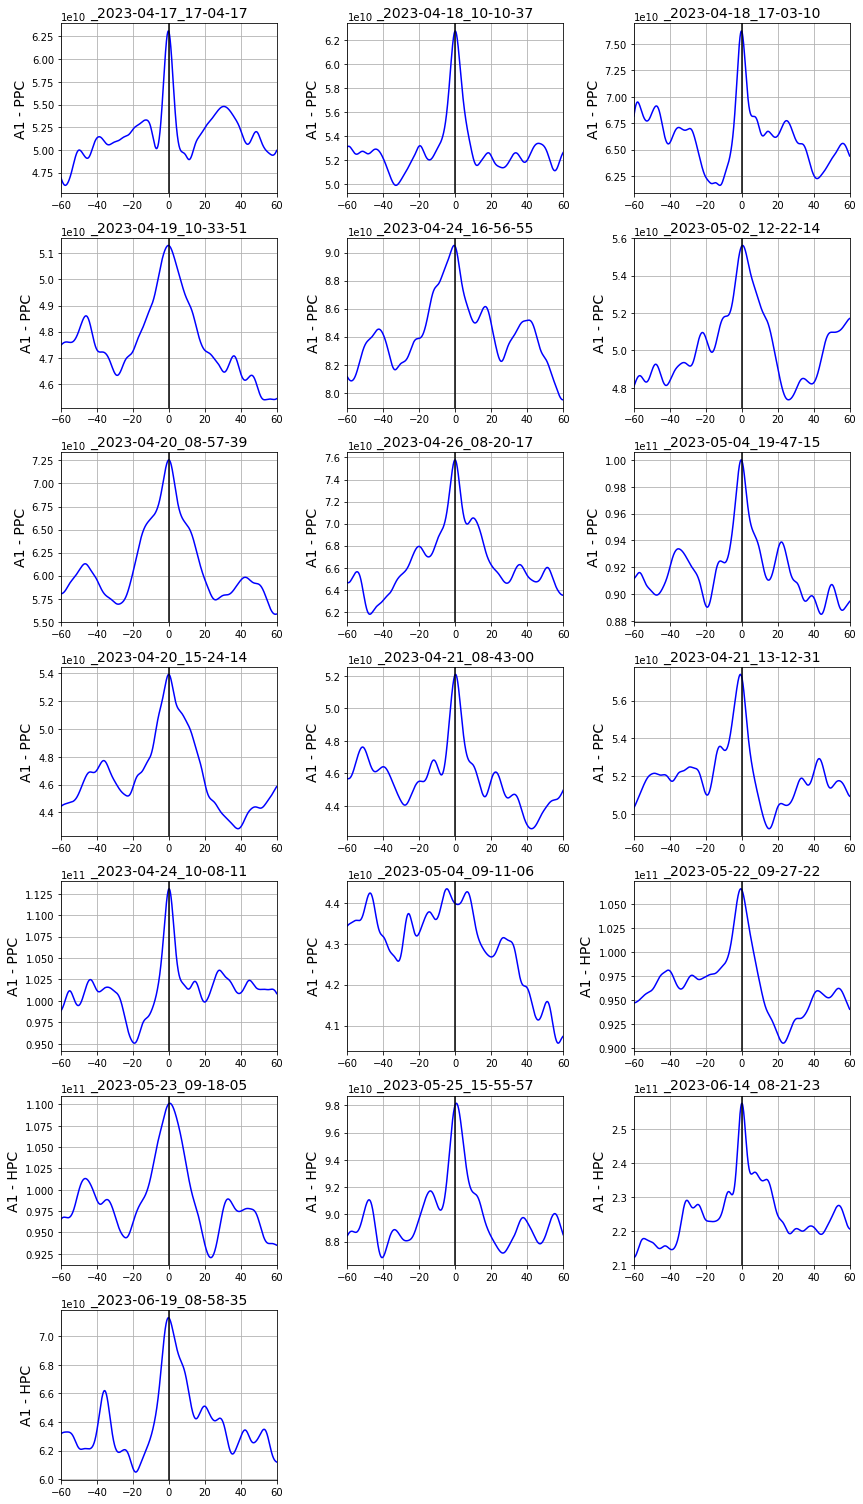

In [33]:
selected = selected_009266[:]
s_rate  = 1000  # Hz
t_lag   = 60  # seconds
columns = 3
rows    = int(len(selected)/columns) + 1

fig = plt.figure(figsize=(12, 3*rows))

for i, session in enumerate(selected):
    animal      = session.split('_')[0]
    sessionpath = os.path.join(source, animal, session)
    aeps_file   = os.path.join(sessionpath, 'AEPs.h5')

    envelopes = {}
    with h5py.File(aeps_file, 'r') as f:
        for area in all_areas:
            if not area in f:
                continue
            envelopes[area] = np.array(f[area]['LFP4Hz']['envelope'])

    areas = list(envelopes.keys())

    metric1 = envelopes[areas[0]]
    metric2 = envelopes[areas[1]]

    corr = signal.correlate(metric1, metric2)
    lags = signal.correlation_lags(len(metric2), len(metric1))
    idx_l, idx_r = int(len(lags)/2) - t_lag*s_rate, int(len(lags)/2) + t_lag*s_rate

    ax = fig.add_subplot(rows, columns, i+1)
    ax.plot(lags[idx_l:idx_r]/s_rate, corr[idx_l:idx_r], color='blue')

    ax.set_ylabel("%s - %s" % (areas[0], areas[1]), fontsize=14)
    ax.set_title(session[-20:], fontsize=14)
    ax.axvline(0, color='black')
    ax.set_xlim(-t_lag, t_lag)
    ax.grid()

fig.tight_layout()